In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy.fftpack import fft,ifft
from schrodinger import Schrodinger
import matplotlib.pyplot as plt
import scipy
import sympy as sp

from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='jshtml')
import seaborn as sns

#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context('poster', font_scale=0.9,  rc={"lines.linewidth": 5})

In [3]:
# specify constants
hbar = 1.0   # planck's constant
m = 1.9      # particle mass

In [4]:
#define x grid:
x = np.linspace(-20,20,2000)

# specify potential at grid points
V_x = np.zeros(shape=x.shape)

In [5]:
#Specify initial wave function at grid points:
@np.vectorize
def psiF(x,sigma=1.0,mu=0.0,k0=1):
    norm = 1/(np.pi*sigma**2)**(1/4)
    f = np.exp(-(x-mu)**2/(4*sigma**2))
    f *= np.exp(np.complex(0,k0*x))
    
    return  norm*f
    
psi_x0 = psiF(x=x)

In [6]:
# define the Schrodinger object which performs the calculations
S = Schrodinger(x=x,  psi_x0=psi_x0, V_x=V_x,
                    hbar=hbar, m=m)

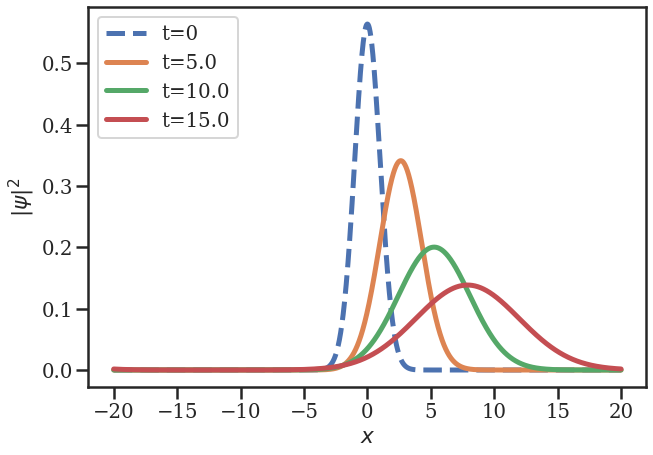

In [7]:
fig = plt.figure(figsize=(10,7))
plt.plot(x,np.abs(psi_x0)**2,linestyle='--',label=r't=0')
S.time_step(dt=1e-2,Nsteps=500)
plt.plot(S.x,np.abs(S.psi_x)**2,label=r't=%1.1f'%S.t)
S.time_step(dt=1e-2,Nsteps=500)
plt.plot(S.x,np.abs(S.psi_x)**2,label=r't=%1.1f'%S.t)
S.time_step(dt=1e-2,Nsteps=500)
plt.plot(S.x,np.abs(S.psi_x)**2,label=r't=%1.1f'%S.t)
plt.legend(loc='upper left')
plt.xlabel(r'$x$')
plt.ylabel(r'$|\psi|^2$')
plt.savefig('gaussianWavePacket.png')
plt.show()